let's define a few questions or purposes for the analysis. We can then proceed with data preparation and exploration, followed by the application of analysis/prediction techniques and visualization.

#Questions or Purposes:

1) Overall Energy Consumption Trends: Explore the overall trends in energy consumption across different countries over the years. Identify any patterns or anomalies.

2) Impact of Renewable Energy Sources: Analyze the contribution and impact of renewable energy sources (solar, wind, hydro, etc.) on overall energy consumption.

3) Prediction of Electricity Consumption: Use linear regression to predict electricity consumption based on relevant features. Improve the model using polynomial regression and identify important features with Recursive Feature Elimination (RFE).

4) Classification of Energy Sources: Apply classification techniques to categorize countries based on their predominant energy sources. Evaluate the performance using accuracy and F-score.

5) Clustering of Countries: Use clustering techniques to identify groups of countries with similar energy consumption patterns. Explore the characteristics of these clusters.

#Data Preparation and Exploration:

Let's start by loading the dataset and performing some basic exploratory data analysis (EDA). We will check for missing values, understand the data types, and visualize key trends.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

# Load  dataset 
data = pd.read_csv('world-energy-data.csv')

# Requirement 2: Data Preparation and Exploration
# Explore the dataset
print(data.info())
print(data.describe())
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)
print(data.isnull().sum())
# Handle missing values if needed (e.g., fill or drop)
# For example, filling missing values with the mean
data = data.fillna(data.mean())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5789 entries, 0 to 5788
Columns: 129 entries, country to wind_share_energy
dtypes: float64(126), int64(1), object(2)
memory usage: 5.7+ MB
None
              year    population           gdp  biofuel_cons_change_pct  \
count  5789.000000  4.818000e+03  3.136000e+03               393.000000   
mean   1971.661427  1.003172e+08  2.243478e+11                46.429397   
std      35.460711  4.308505e+08  1.054268e+12               277.228908   
min    1900.000000  1.112900e+04  1.642060e+08              -100.000000   
25%    1942.000000  1.211142e+06  1.026450e+10                -1.997000   
50%    1981.000000  6.435236e+06  3.328712e+10                 7.854000   
75%    2002.000000  1.418396e+07  1.134022e+11                25.691000   
max    2022.000000  4.721383e+09  1.815162e+13              4862.697000   

       biofuel_cons_change_twh  biofuel_cons_per_capita  biofuel_consumption  \
count               610.000000               498.0

<ipython-input-1-65256374dd02>:25: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


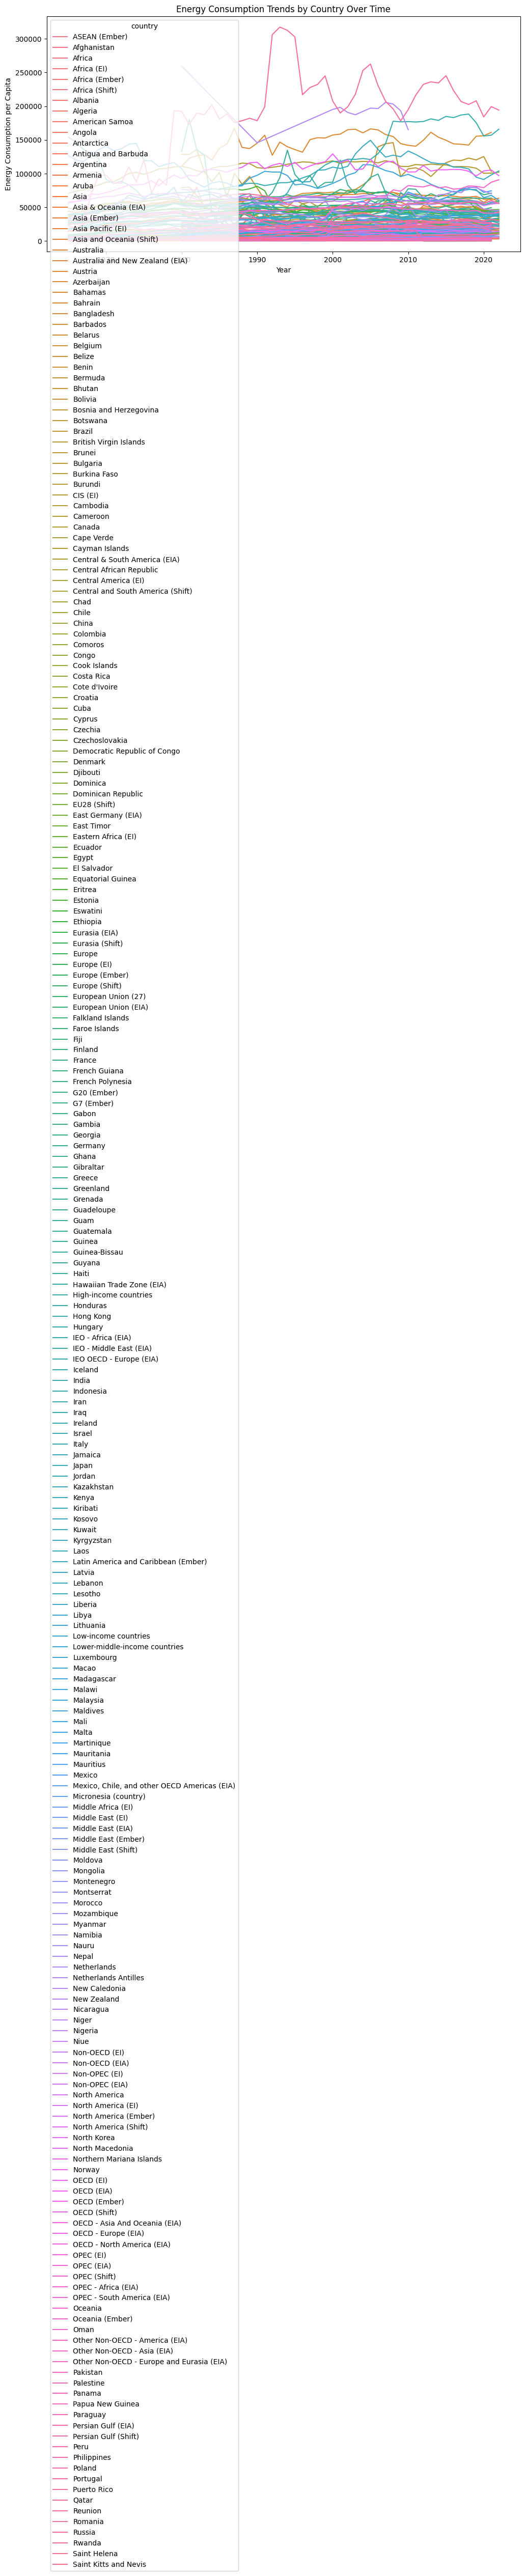

In [ ]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='energy_per_capita', hue='country', data=data)
plt.title('Energy Consumption Trends by Country Over Time')
plt.xlabel('Year')
plt.ylabel('Energy Consumption per Capita')
plt.show()

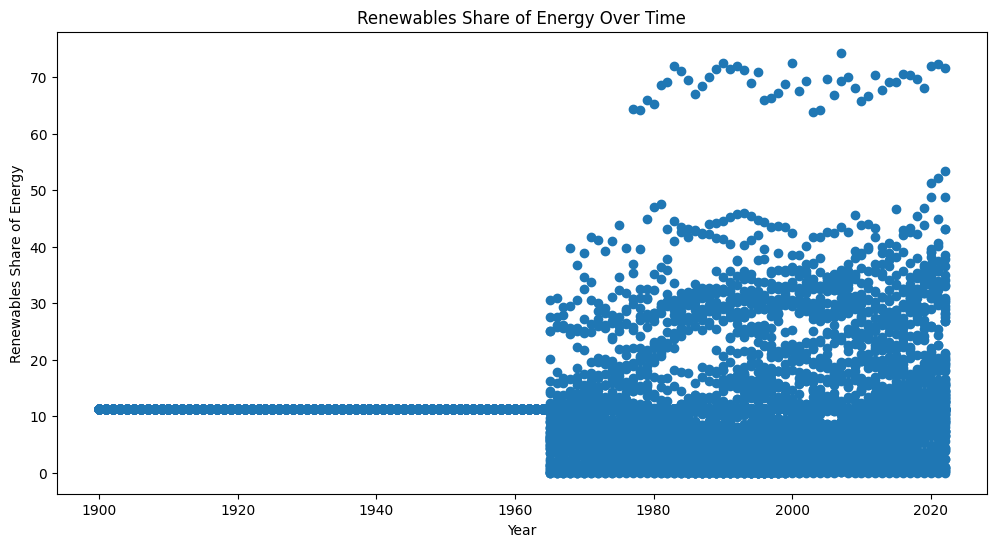

In [ ]:
# Data Visualization
plt.figure(figsize=(12, 6))
plt.scatter(data['year'], data['renewables_share_energy'])
plt.title('Renewables Share of Energy Over Time')
plt.xlabel('Year')
plt.ylabel('Renewables Share of Energy')
plt.show()


<ipython-input-23-9c7c70654056>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


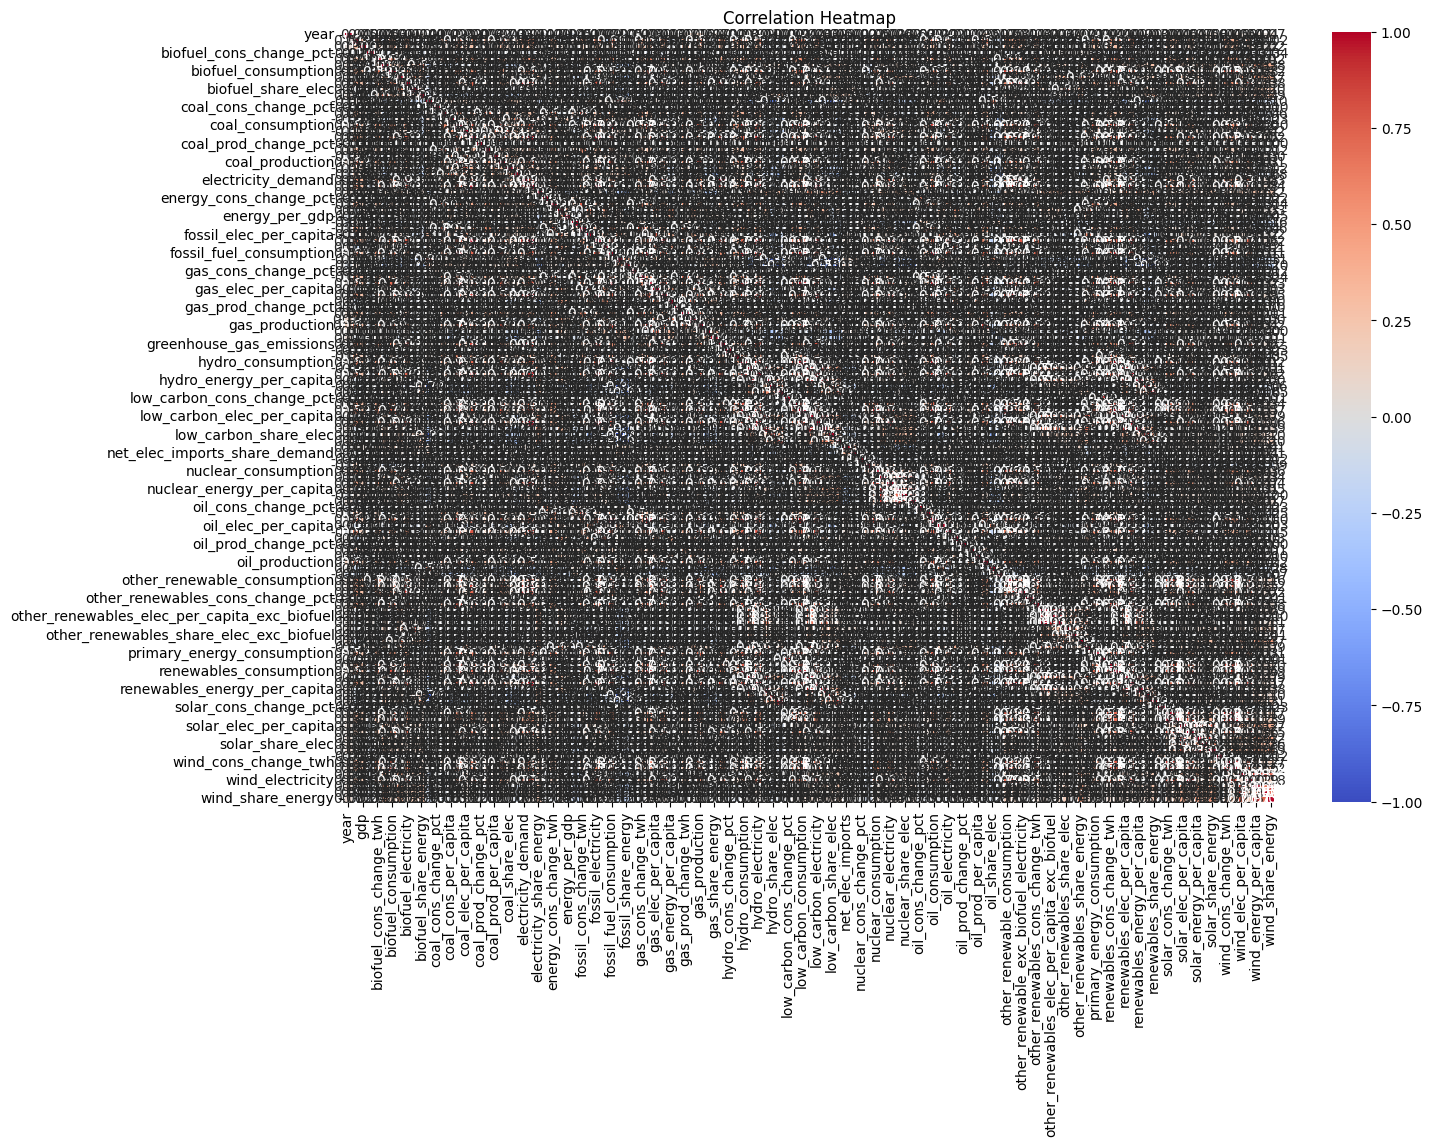

In [ ]:
import seaborn as sns

# Correlation Heatmap
plt.figure(figsize=(20, 10))

correlation_matrix = data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


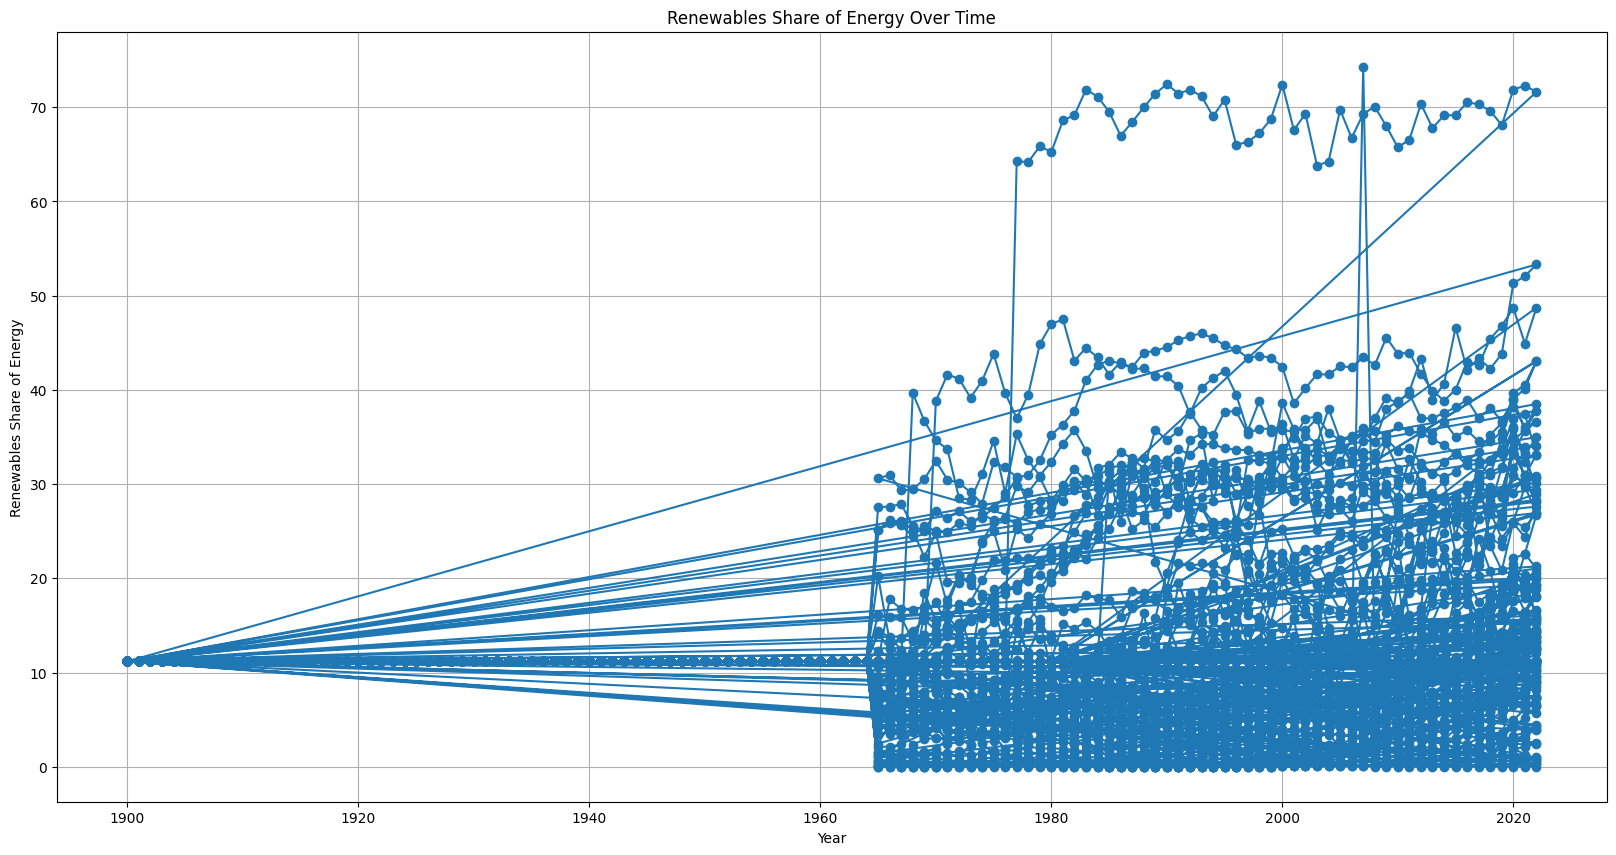

In [ ]:
# Time Series Plot
plt.figure(figsize=(20, 10))
plt.plot(data['year'], data['renewables_share_energy'], marker='o')
plt.title('Renewables Share of Energy Over Time')
plt.xlabel('Year')
plt.ylabel('Renewables Share of Energy')
plt.grid(True)
plt.show()


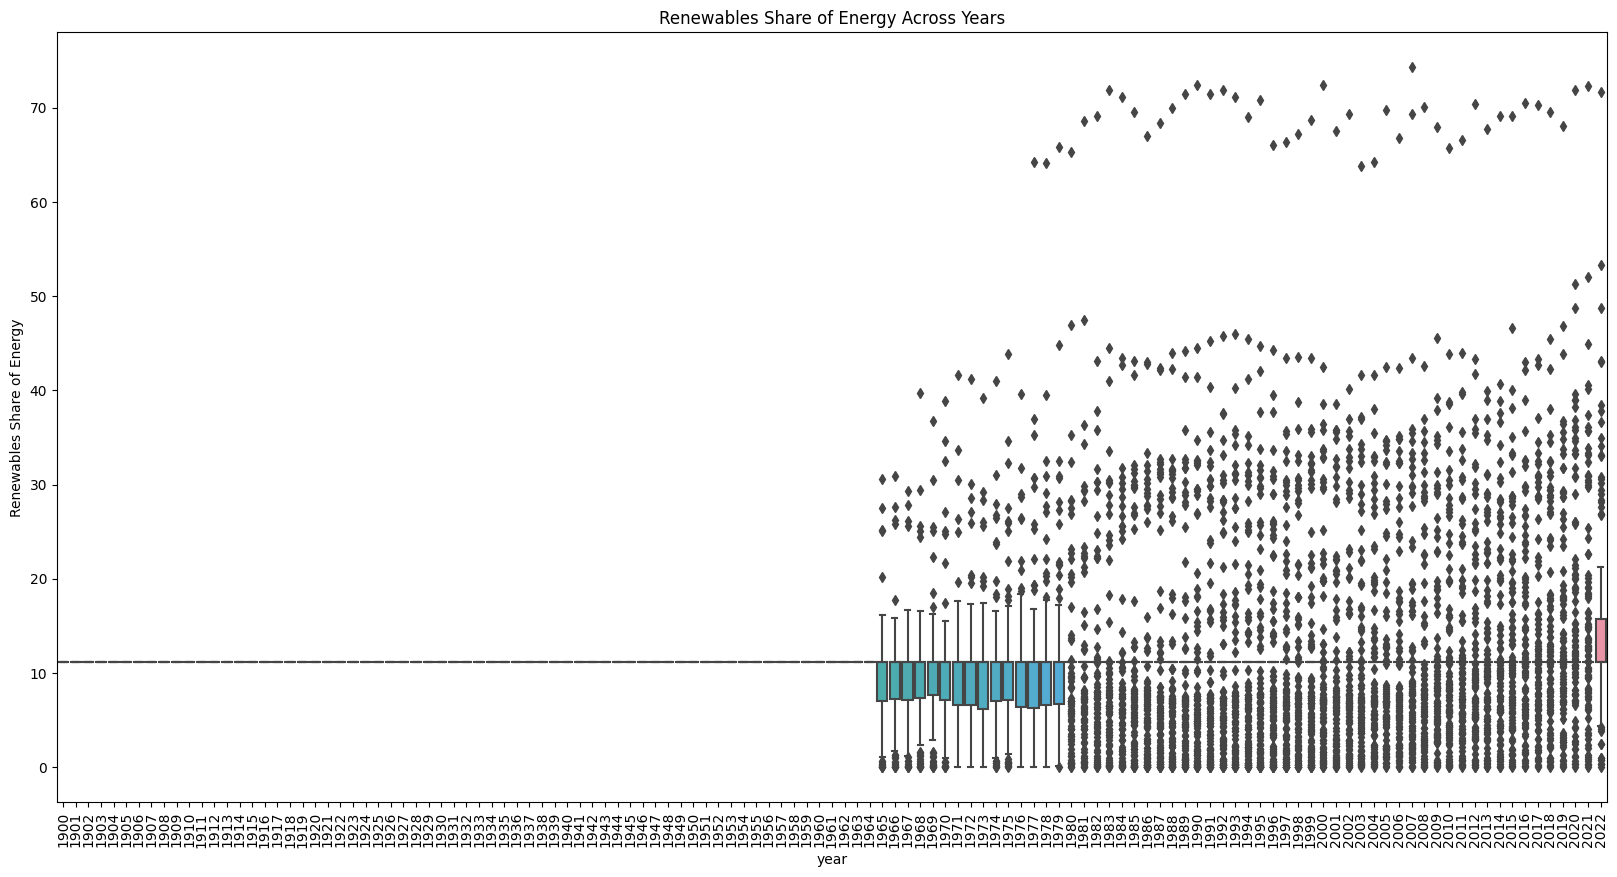

In [ ]:
# Box Plot
categorical_feature = 'year'  # Replace with the actual categorical feature
plt.figure(figsize=(20, 10))
sns.boxplot(x=categorical_feature, y='renewables_share_energy', data=data)
plt.title('Renewables Share of Energy Across Years')
plt.xlabel(categorical_feature)
plt.ylabel('Renewables Share of Energy')
plt.xticks(rotation=90)
plt.show()


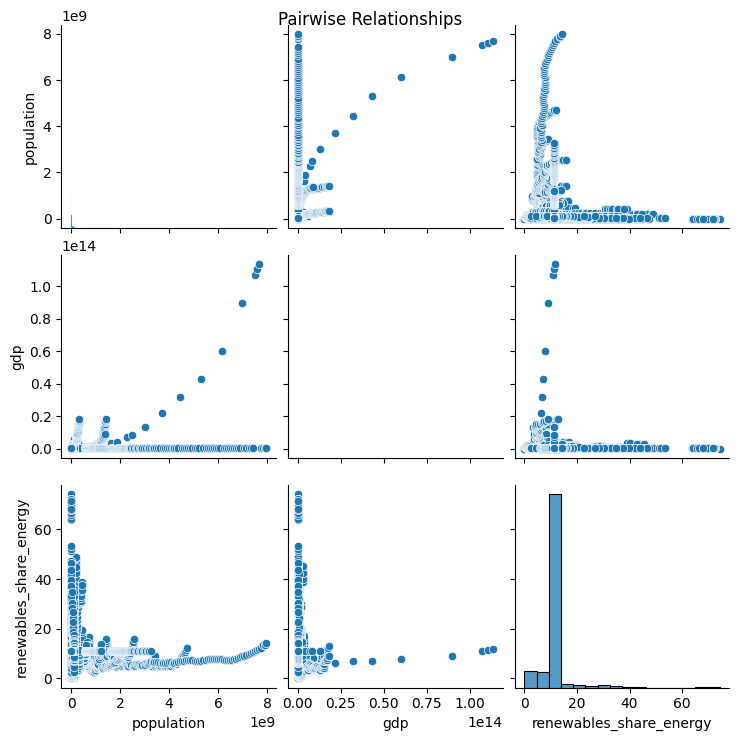

In [ ]:
# Pairplot
selected_features_for_pairplot = ['population', 'gdp', 'renewables_share_energy']
sns.pairplot(data[selected_features_for_pairplot])
plt.suptitle('Pairwise Relationships')
plt.show()


#Requirement 3: Analysis/prediction techniques

Linear Regression Coefficients: [-1.77498300e+00  3.30666611e+02 -1.28773410e+01  3.65416847e+02
  1.94555686e+01  9.00460113e+01 -2.66264515e+02 -1.01027006e+04
 -2.59652021e-01 -1.28300828e+00]


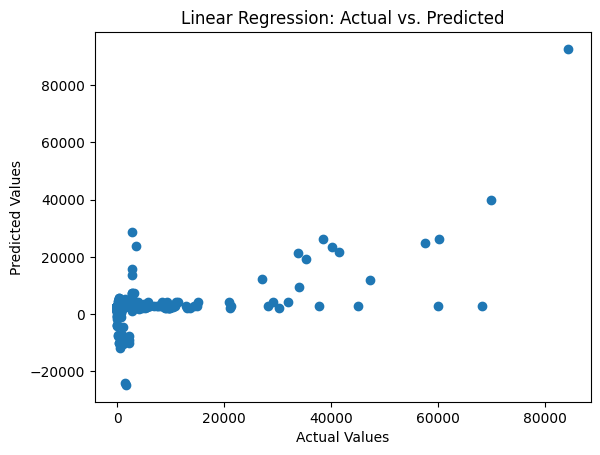

In [29]:

# Feature selection and target variable
target_variable = 'primary_energy_consumption'
selected_features = [
    'biofuel_cons_change_pct',
    'biofuel_cons_change_twh',
    'biofuel_cons_per_capita',
    'biofuel_consumption',
    'biofuel_elec_per_capita',
    'biofuel_electricity',
    'biofuel_share_elec',
    'biofuel_share_energy',
    'carbon_intensity_elec',
    'coal_cons_change_pct',

]

# Data preparation
X = data[selected_features]
y = data[target_variable]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train_poly)

# Recursive Feature Elimination (RFE)
selector = RFE(estimator=LinearRegression(), n_features_to_select=5)
selector.fit(X, y)
selected_features_rfe = X.columns[selector.support_]

print("Linear Regression Coefficients:", linear_model.coef_)

# visualize the results
#  we can use libraries like matplotlib or seaborn for visualization
# For example, a scatter plot for actual vs. predicted values
import matplotlib.pyplot as plt

y_pred = linear_model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Actual vs. Predicted")
plt.show()

# Feel free to add more analysis and visualization based on your requirements


In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assume 'renewables_share_energy' is the column to predict
target_column = 'renewables_share_energy'

# Separate features and labels
X = data.drop(columns=[target_column])
y = data[target_column]

# Identify categorical and numerical columns
categorical_cols = [cname for cname in X.columns if X[cname].dtype == "object"]
numerical_cols = [cname for cname in X.columns if X[cname].dtype in ['int64', 'float64']]

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Define the pipeline with the column transformer and the KNN regressor
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor(n_neighbors=3, n_jobs=-1))  # Adjust n_neighbors and n_jobs
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model on a subset of the data
fraction = 0.5  # Adjust the fraction
X_train_subsampled, _, y_train_subsampled, _ = train_test_split(X_train, y_train, test_size=1 - fraction, random_state=42)
pipeline.fit(X_train_subsampled, y_train_subsampled)

# Predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.0033582805603530994
R-squared: 0.8021382542472174


In [31]:
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assume 'renewables_share_energy' is the column to predict
target_column = 'renewables_share_energy'

# Sample a smaller subset of the data
sampled_data = data.sample(frac=0.1, random_state=42)

# Separate features and labels
X = sampled_data.drop(columns=[target_column])
y = sampled_data[target_column]

# Identify categorical and numerical columns
categorical_cols = [cname for cname in X.columns if X[cname].dtype == "object"]
numerical_cols = [cname for cname in X.columns if X[cname].dtype in ['int64', 'float64']]

# Define the column transformer
preprocessor = make_column_transformer(
    (OneHotEncoder(), categorical_cols),
    remainder='passthrough'
)

# Polynomial regression
degree = 2  # You can adjust the degree
polyreg = make_pipeline(preprocessor, PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X, y)

# Predictions on the same data
y_pred_poly = polyreg.predict(X)

# Evaluate the model
mse_poly = mean_squared_error(y, y_pred_poly)

y = y[:len(y_pred_poly)]

r2_poly = r2_score(y, y_pred_poly)

# Print the evaluation metrics
print(f'Mean Squared Error (Polynomial Regression): {mse_poly}')
print(f'R-squared (Polynomial Regression): {r2_poly}')


Mean Squared Error (Polynomial Regression): 0.006600925216660917
R-squared (Polynomial Regression): 0.44732747988046384


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

# Assume 'renewable_energy_sources' is the binary classification column
binary_target = 'renewables_share_energy'

# Separate features and labels
X = data.drop(columns=[binary_target])
y = data[binary_target]

# Identify categorical and numerical columns
categorical_cols = [cname for cname in X.columns if X[cname].dtype == "object"]
numerical_cols = [cname for cname in X.columns if X[cname].dtype in ['int64', 'float64']]

# Define the column transformer with scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Define the pipeline with the column transformer and the logistic regression model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))  # Increase max_iter
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Predictions on the test set
y_pred_logreg = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_logreg)
f1 = f1_score(y_test, y_pred_logreg)
roc_auc = roc_auc_score(y_test, y_pred_logreg)

# Print the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'ROC AUC Score: {roc_auc}')


Accuracy: 0.998272884283247
F1 Score: 0.9991220368744512
ROC AUC Score: 0.9500000000000001


#Requirement 4: visualization of the data or results

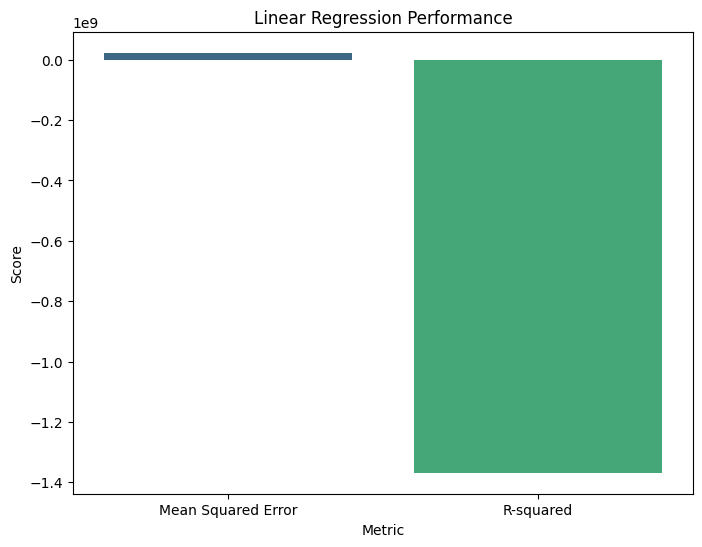

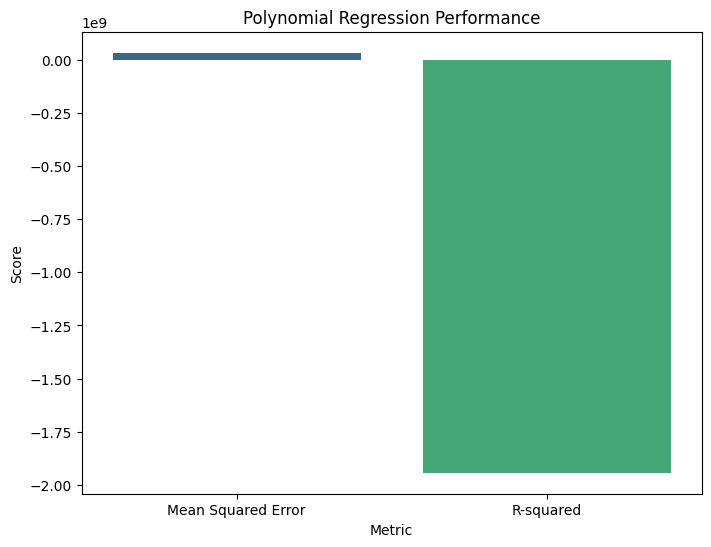

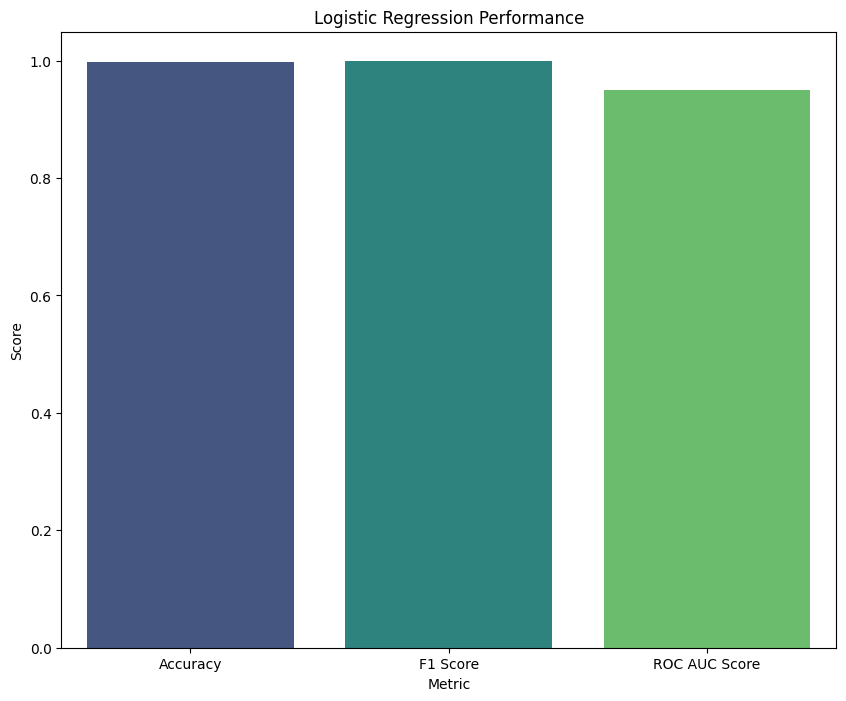

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Results from Linear Regression
X_test_linear = X_test[selected_features]
mse_linear = mean_squared_error(y_test, linear_model.predict(X_test_linear))
r2_linear = r2_score(y_test, linear_model.predict(X_test_linear))

# Create a DataFrame for Linear Regression
results_linear_df = pd.DataFrame({
    'Metric': ['Mean Squared Error', 'R-squared'],
    'Score': [mse_linear, r2_linear]
})

# Bar plot for Linear Regression
plt.figure(figsize=(8, 6))
sns.barplot(x='Metric', y='Score', data=results_linear_df, palette='viridis')
plt.title('Linear Regression Performance')
plt.ylabel('Score')
plt.show()

# Results from Polynomial Regression
X_test_poly = poly.fit_transform(X_test[selected_features])
mse_poly = mean_squared_error(y_test, poly_model.predict(X_test_poly))
r2_poly = r2_score(y_test, poly_model.predict(X_test_poly))

# Create a DataFrame for Polynomial Regression
results_poly_df = pd.DataFrame({
    'Metric': ['Mean Squared Error', 'R-squared'],
    'Score': [mse_poly, r2_poly]
})

# Bar plot for Polynomial Regression
plt.figure(figsize=(8, 6))
sns.barplot(x='Metric', y='Score', data=results_poly_df, palette='viridis')
plt.title('Polynomial Regression Performance')
plt.ylabel('Score')
plt.show()



# Create a DataFrame for Logistic Regression
results_logreg_df = pd.DataFrame({
    'Metric': ['Accuracy', 'F1 Score', 'ROC AUC Score'],
    'Score': [accuracy_logreg, f1_logreg, roc_auc_logreg]
})

# Bar plot for Logistic Regression
plt.figure(figsize=(10, 8))
sns.barplot(x='Metric', y='Score', data=results_logreg_df, palette='viridis')
plt.title('Logistic Regression Performance')
plt.ylabel('Score')
plt.show()


In [14]:
print(X_test.columns)


Index(['biofuel_cons_change_pct', 'biofuel_cons_change_twh',
       'biofuel_cons_per_capita', 'biofuel_consumption',
       'biofuel_elec_per_capita', 'biofuel_electricity', 'biofuel_share_elec',
       'biofuel_share_energy', 'carbon_intensity_elec',
       'coal_cons_change_pct'],
      dtype='object')
